In [282]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification

In [283]:
# Creating a dataset

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)


In [6]:
X.shape, y.shape

((100, 2), (100,))

In [7]:
np.random.randint(0,100)

34

In [8]:
y.shape,np.ones(X.shape[1]).shape

((100,), (2,))

In [239]:
class LogisticRegressionByScratch:
  """
  This class provides methods to perform Logistic Regression on the data.
  """
  def __init__(self,learning_rate = 0.1):
    self.lr = learning_rate

  def sigmoid(self,z)-> float:
    """
    Performs a sigmoid function on the input.

    Args:
      z: A float
    """
    return 1/(1 + np.exp(-z))
  
  def fit(self,X,Y)-> None:
    """
    To compute the weights.

    Args:
      X: np.array  
      Y: np.array
    """
    # X = np.array(X)
    # Y = np.array(Y)
    # Adding a column in the zeroth position for the intercept paramter
    X = np.insert(X,0,1,axis = 1)
    # Creating an initial weight matrix with 1
    self.weights = np.ones(X.shape[1])
    
    # Implementing Gradient Descent
    for i in range(8000):
      # A random number j is generated
      j = np.random.randint(0,X.shape[0])
      # Prediction is calculated
      y_hat  = self.sigmoid(np.dot(X,self.weights))
      # Now updating the weight
      self.weights = self.weights + self.lr*((np.dot(X.T,(Y-y_hat)))/X.shape[0])


    
  
  def predict(self, X) -> np.array:
        """
        Predicts the labels for the input data X.

        Args:
            X: np.array
        """
        # Adding a column in the zeroth position for the intercept parameter
        X = np.insert(X, 0, 1, axis=1)
        y_hat = self.sigmoid(np.dot(X, self.weights))
        return (y_hat >= 0.5).astype(int), self.weights

In [258]:
ls = LogisticRegressionByScratch(learning_rate = 0.0374)
ls.fit(X,y)
y_hat, w = ls.predict(X)

In [259]:
intercept, coeff = w[0],w[1:]

In [260]:
coeff

array([2.71058305, 0.12490654])

In [261]:
intercept

3.364389957035395

In [262]:
# Converting from standard to slope intercept form
b = -(intercept/coeff[1])
m = -(coeff[0]/coeff[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

In [263]:
m

-21.70089009483508

In [264]:
X[0]

array([ 0.82321545, -0.11697552])

(-3.0, 3.0)

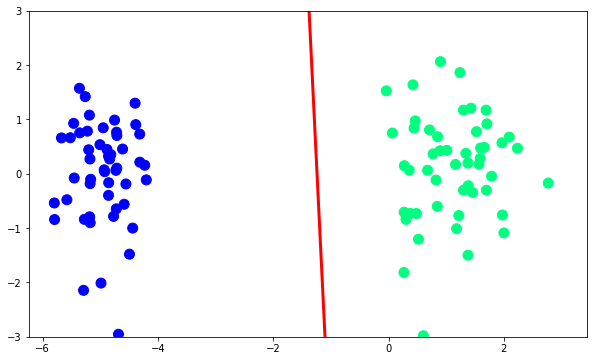

In [281]:
plt.figure(figsize =(10,6))
plt.plot(x_input2,y_input2,color = 'red', linewidth = 3)
plt.scatter(X[:,0], X[:,1],c = y,cmap ='winter', s = 100)
plt.ylim(-3,3)

## Comparing the decision boundary with scikit Learn Logistic Regression and Stochastic Gradient descent Classifier

In [277]:
lor = LogisticRegression(penalty = 'none',solver = 'sag',max_iter = 2000)
lor.fit(X,y)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

In [278]:
m

-21.383373363582038

In [279]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X,y)
m = -(sgd.coef_[0][0]/sgd.coef_[0][1])
b = -(sgd.intercept_/sgd.coef_[0][1])
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input3 + b

(-3.0, 3.0)

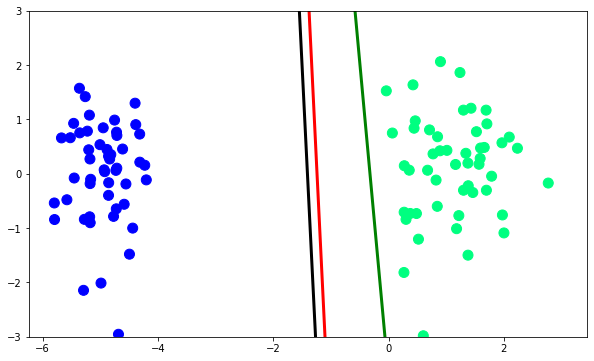

In [280]:
plt.figure(figsize =(10,6))
plt.plot(x_input2,y_input2,color = 'red', linewidth = 3)
plt.plot(x_input1,y_input1,color = 'black', linewidth = 3)
plt.plot(x_input3,y_input3,color = 'green', linewidth = 3)
plt.scatter(X[:,0], X[:,1],c = y,cmap ='winter', s = 100)
plt.ylim(-3,3)